In [1]:
import pathlib
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
data = pd.read_excel("../media/break_vigenere_20221105_FirstTest.xlsx")

In [42]:
data = data.drop("Unnamed: 0", axis=1)

In [43]:
data["score"] = data["selection_max"]/data["target"]
data["progress"] = 1 - data["hamming_distance"]/data["key_size"]

In [44]:
data

,generation,generation_count,seed,mutation_threshold,key_size,population_size,global_min,global_max,selection_min,selection_max,best_individual,elapsed,hamming_distance,weights,target,original_key,text_length,path,score,progress
0,1,50,123456789,0.50,6,10,-2576.095225,-2280.620646,-2495.653214,-2280.620646,PUOSEM,0.057949,5,"[0.6, 0.3, 0.1]",-1357.979929,SECRET,1174,pysgrs\resources\texts\fr\baudelaire.txt,1.679421,0.166667
1,2,50,123456789,0.50,6,10,-2506.191179,-2280.620646,-2446.151979,-2280.620646,PUOSEM,0.061206,5,"[0.6, 0.3, 0.1]",-1357.979929,SECRET,1174,pysgrs\resources\texts\fr\baudelaire.txt,1.679421,0.166667
2,3,50,123456789,0.50,6,10,-2462.217341,-2280.620646,-2404.375268,-2280.620646,PUOSEM,0.057754,5,"[0.6, 0.3, 0.1]",-1357.979929,SECRET,1174,pysgrs\resources\texts\fr\baudelaire.txt,1.679421,0.166667
3,4,50,123456789,0.50,6,10,-2527.355676,-2183.031944,-2374.401020,-2183.031944,SAEZEU,0.057145,4,"[0.6, 0.3, 0.1]",-1357.979929,SECRET,1174,pysgrs\resources\texts\fr\baudelaire.txt,1.607558,0.333333
4,5,50,123456789,0.50,6,10,-2505.820515,-2096.441564,-2297.222370,-2096.441564,SAEDEU,0.058003,4,"[0.6, 0.3, 0.1]",-1357.979929,SECRET,1174,pysgrs\resources\texts\fr\baudelaire.txt,1.543794,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102056,46,50,546987123,0.99,27,1000,-423.814850,-345.051340,-354.146961,-345.051340,OMLIIRHIWJKLINOPTROKATUWQMZ,0.748665,18,"[0, 0, 1]",-369.270453,ABCDEFGHIJKLMNOPQRSTUZVWXYZ,123,pysgrs\resources\texts\fr\voltaire.txt,0.934414,0.333333
102057,47,50,546987123,0.99,27,1000,-410.302003,-344.488410,-352.342129,-344.488410,OMLIIRHIWJKLINOPTROKRGUWQMZ,0.739885,18,"[0, 0, 1]",-369.270453,ABCDEFGHIJKLMNOPQRSTUZVWXYZ,123,pysgrs\resources\texts\fr\voltaire.txt,0.932889,0.333333
102058,48,50,546987123,0.99,27,1000,-421.507638,-344.488410,-350.769865,-344.488410,OMLIIRHIWJKLINOPTROKRGUWQMZ,0.757103,18,"[0, 0, 1]",-369.270453,ABCDEFGHIJKLMNOPQRSTUZVWXYZ,123,pysgrs\resources\texts\fr\voltaire.txt,0.932889,0.333333
102059,49,50,546987123,0.99,27,1000,-404.692866,-344.488410,-348.531768,-344.488410,OMLIIRHIWJKLINOPTROKRGUWQMZ,0.706018,18,"[0, 0, 1]",-369.270453,ABCDEFGHIJKLMNOPQRSTUZVWXYZ,123,pysgrs\resources\texts\fr\voltaire.txt,0.932889,0.333333


In [45]:
data.dtypes

generation              int64
generation_count        int64
seed                    int64
mutation_threshold    float64
key_size                int64
population_size         int64
global_min            float64
global_max            float64
selection_min         float64
selection_max         float64
best_individual        object
elapsed               float64
hamming_distance        int64
weights                object
target                float64
original_key           object
text_length             int64
path                   object
score                 float64
progress              float64
dtype: object

In [46]:
progress = data.groupby("path").agg({
    "seed": "count",
    "weights": "last",
    "population_size": "last",
    "mutation_threshold": "last",
    "key_size": "last",
    "hamming_distance": "last",
    "global_min": "first",
    "selection_max": "last",
    "target": "last",
    "text_length":"last",
    "elapsed": ["mean", "sum"]
})
progress.columns = progress.columns.map(lambda x: "_".join(x)) #.replace("_last", ""))
progress["finished"] = progress["hamming_distance_last"] == 0
progress["symbol_progress"] = 1 - progress["hamming_distance_last"]/progress["key_size_last"]
progress["score_progress"] = 1 - (progress["target_last"] - progress["selection_max_last"])/(progress["target_last"] - progress["global_min_first"])
progress

,seed_count,weights_last,population_size_last,mutation_threshold_last,key_size_last,hamming_distance_last,global_min_first,selection_max_last,target_last,text_length_last,elapsed_mean,elapsed_sum,finished,symbol_progress,score_progress
path,,,,,,,,,,,,,,,
pysgrs\resources\texts\fr\baudelaire.txt,24721,"[0, 0, 1]",1000,0.99,27,0,-2576.095225,-2740.210118,-2740.210118,1174,1.730340,42775.747130,True,1.000000,1.000000
pysgrs\resources\texts\fr\rouseau.txt,23579,"[0, 0, 1]",1000,0.99,27,0,-15658.738257,-16384.279514,-16384.279514,5671,8.044825,189688.930667,True,1.000000,1.000000
pysgrs\resources\texts\fr\trial.txt,24375,"[0, 0, 1]",1000,0.99,27,1,-2497.762668,-2696.439725,-2596.303095,885,1.285359,31330.613480,False,0.962963,2.016198
pysgrs\resources\texts\fr\voltaire.txt,29386,"[0, 0, 1]",1000,0.99,27,18,-347.675766,-344.488410,-369.270453,123,0.267752,7868.164145,False,0.333333,-0.147599


In [47]:
data.query("(progress > 0.8) & (original_key == 'SECRET')")["best_individual"].to_csv("text.txt", index=False)

<AxesSubplot:xlabel='key_size_last'>

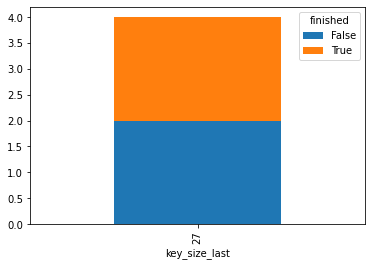

In [48]:
progress.pivot_table(
    index="key_size_last", columns="finished", values="seed_count", aggfunc="count"
).plot(kind="bar", stacked="true")

<AxesSubplot:xlabel='population_size_last'>

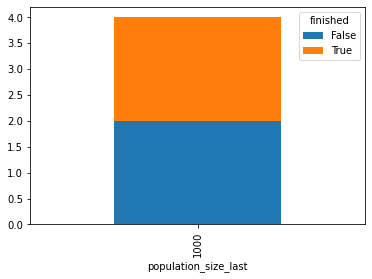

In [49]:
progress.pivot_table(
    index="population_size_last", columns="finished", values="seed_count", aggfunc="count"
).plot(kind="bar", stacked="true")

<AxesSubplot:xlabel='mutation_threshold_last'>

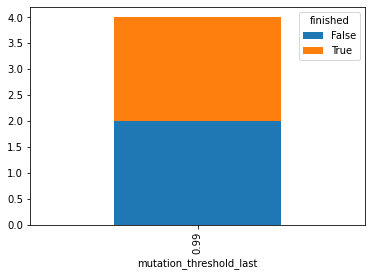

In [50]:
progress.pivot_table(
    index="mutation_threshold_last", columns="finished", values="seed_count", aggfunc="count"
).plot(kind="bar", stacked="true")

<AxesSubplot:xlabel='symbol_progress', ylabel='score_progress'>

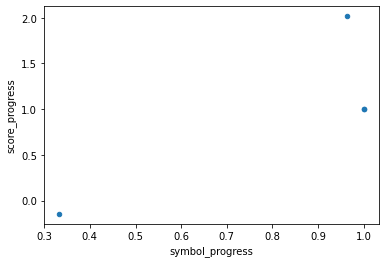

In [51]:
progress.plot.scatter(x="symbol_progress", y="score_progress")

<AxesSubplot:title={'center':'elapsed_mean'}, xlabel='key_size_last'>

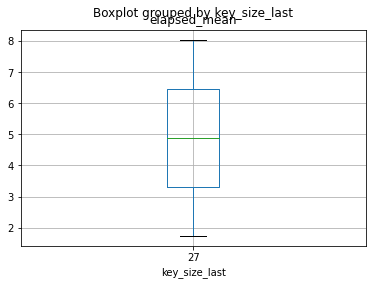

In [52]:
progress.query("finished").boxplot(by="key_size_last", column="elapsed_mean")

<AxesSubplot:title={'center':'elapsed_sum'}, xlabel='key_size_last'>

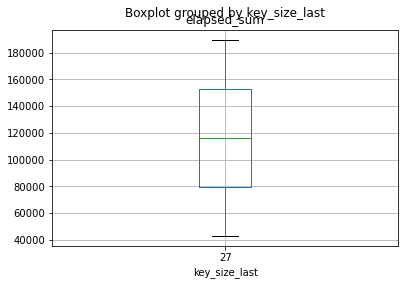

In [53]:
progress.query("finished").boxplot(by="key_size_last", column="elapsed_sum")

<AxesSubplot:title={'center':'seed_count'}, xlabel='key_size_last'>

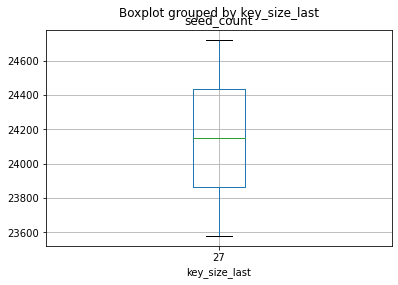

In [54]:
progress.query("finished").boxplot(by="key_size_last", column="seed_count")

<AxesSubplot:title={'center':'elapsed_mean'}, xlabel='population_size_last'>

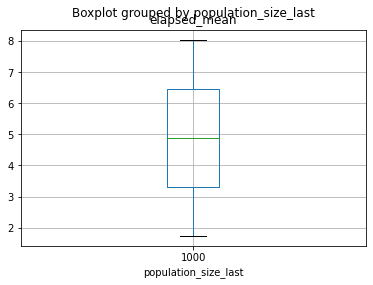

In [55]:
progress.query("finished").boxplot(by="population_size_last", column="elapsed_mean")

<AxesSubplot:title={'center':'elapsed_sum'}, xlabel='population_size_last'>

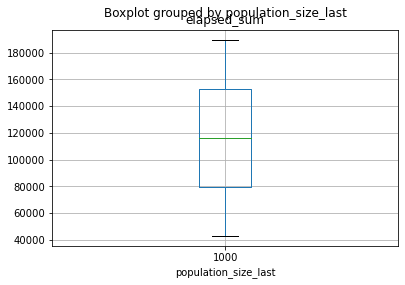

In [56]:
progress.query("finished").boxplot(by="population_size_last", column="elapsed_sum")

<AxesSubplot:title={'center':'seed_count'}, xlabel='population_size_last'>

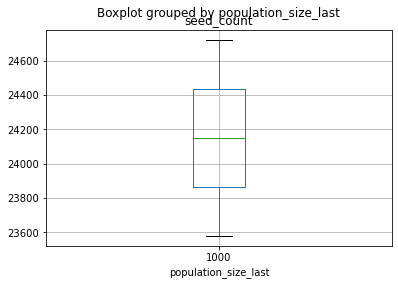

In [57]:
progress.query("finished").boxplot(by="population_size_last", column="seed_count")

<AxesSubplot:title={'center':'seed_count'}, xlabel='population_size_last'>

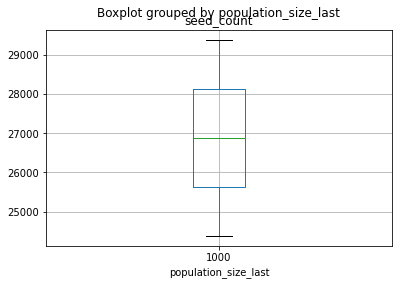

In [58]:
progress.query("~finished").boxplot(by="population_size_last", column="seed_count")

<AxesSubplot:title={'center':'seed_count'}, xlabel='population_size_last'>

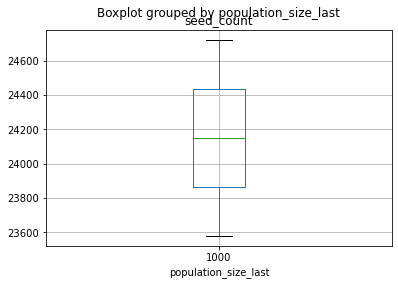

In [59]:
progress.query("finished").boxplot(by="population_size_last", column="seed_count")

<AxesSubplot:title={'center':'elapsed_mean'}, xlabel='mutation_threshold_last'>

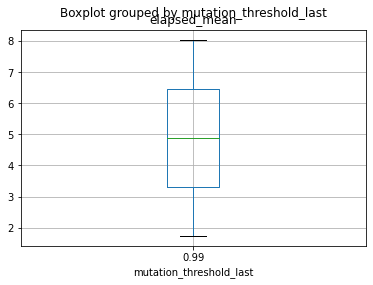

In [60]:
progress.query("finished").boxplot(by="mutation_threshold_last", column="elapsed_mean")

<AxesSubplot:title={'center':'elapsed_sum'}, xlabel='[mutation_threshold_last, finished]'>

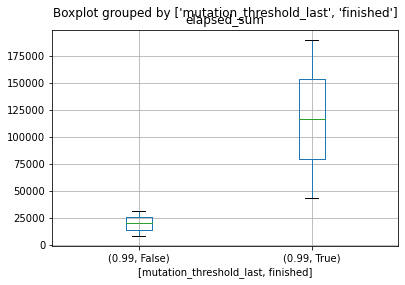

In [61]:
progress.boxplot(by=["mutation_threshold_last", "finished"], column="elapsed_sum")

<AxesSubplot:title={'center':'seed_count'}, xlabel='[mutation_threshold_last, finished]'>

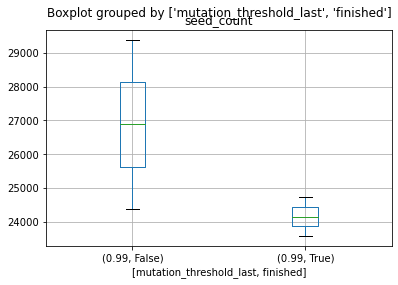

In [62]:
progress.boxplot(by=["mutation_threshold_last", "finished"], column="seed_count")

In [63]:
data.groupby("path")["elapsed"]

In [64]:
data.dtypes

generation              int64
generation_count        int64
seed                    int64
mutation_threshold    float64
key_size                int64
population_size         int64
global_min            float64
global_max            float64
selection_min         float64
selection_max         float64
best_individual        object
elapsed               float64
hamming_distance        int64
weights                object
target                float64
original_key           object
text_length             int64
path                   object
score                 float64
progress              float64
dtype: object

In [65]:
data.groupby("weights").count()

,generation,generation_count,seed,mutation_threshold,key_size,population_size,global_min,global_max,selection_min,selection_max,best_individual,elapsed,hamming_distance,target,original_key,text_length,path,score,progress
weights,,,,,,,,,,,,,,,,,,,
"[0, 0, 1]",25049,25049,25049,25049,25049,25049,25049,25049,25049,25049,25049,25049,25049,25049,25049,25049,25049,25049,25049
"[0, 1, 0]",25595,25595,25595,25595,25595,25595,25595,25595,25595,25595,25595,25595,25595,25595,25595,25595,25595,25595,25595
"[0.6, 0.3, 0.1]",25129,25129,25129,25129,25129,25129,25129,25129,25129,25129,25129,25129,25129,25129,25129,25129,25129,25129,25129
"[1, 0, 0]",26288,26288,26288,26288,26288,26288,26288,26288,26288,26288,26288,26288,26288,26288,26288,26288,26288,26288,26288


<AxesSubplot:xlabel='weights_last'>

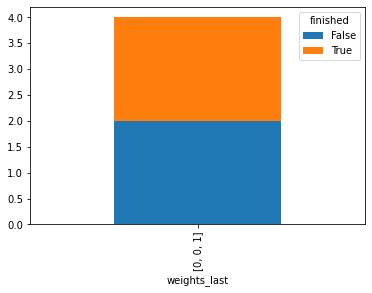

In [66]:
progress.groupby(["weights_last", "finished"])["seed_count"].count().unstack().plot(kind="bar", stacked=True)